# Analysis notebook: `SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV`  

No veto, for analysis of delta T.

## Define analysis name

In [1]:
ana_label = "SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV

analysis.csv	hists.h5     SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV.log
cut_flow.csv	info.txt     SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV.yaml
events.parquet	results.pkl


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV/events.parquet
[Load] ✅ Loaded info from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"])

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2160537,100,100,No selection applied
1,has_trk_front,Preselect,2126506,98.425,98.425,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2054807,95.106,96.628,Electron track fits
3,one_reco_electron,Preselect,1479584,68.482,72.006,One reco electron / event
4,is_downstream,Preselect,825787,38.221,55.812,Downstream tracks (p_z > 0 at tracker entrance)
5,is_truth_electron,Preselect,258271,11.954,31.276,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,182914,8.466,70.823,Track fit quality > 0.2
7,within_t0,Tracker,149420,6.916,81.689,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,within_t0err,Tracker,140902,6.522,94.299,Track fit t0 uncertainty (t0err < 0.9 ns)
9,has_hits,Tracker,139272,6.446,98.843,>20 active tracker hits


### Efficiency & rates

In [7]:
# display(results["analysis"])

### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Load] ✅ Initialised with out_path=test_out
[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV/h1o_1x3_mom_windows.png


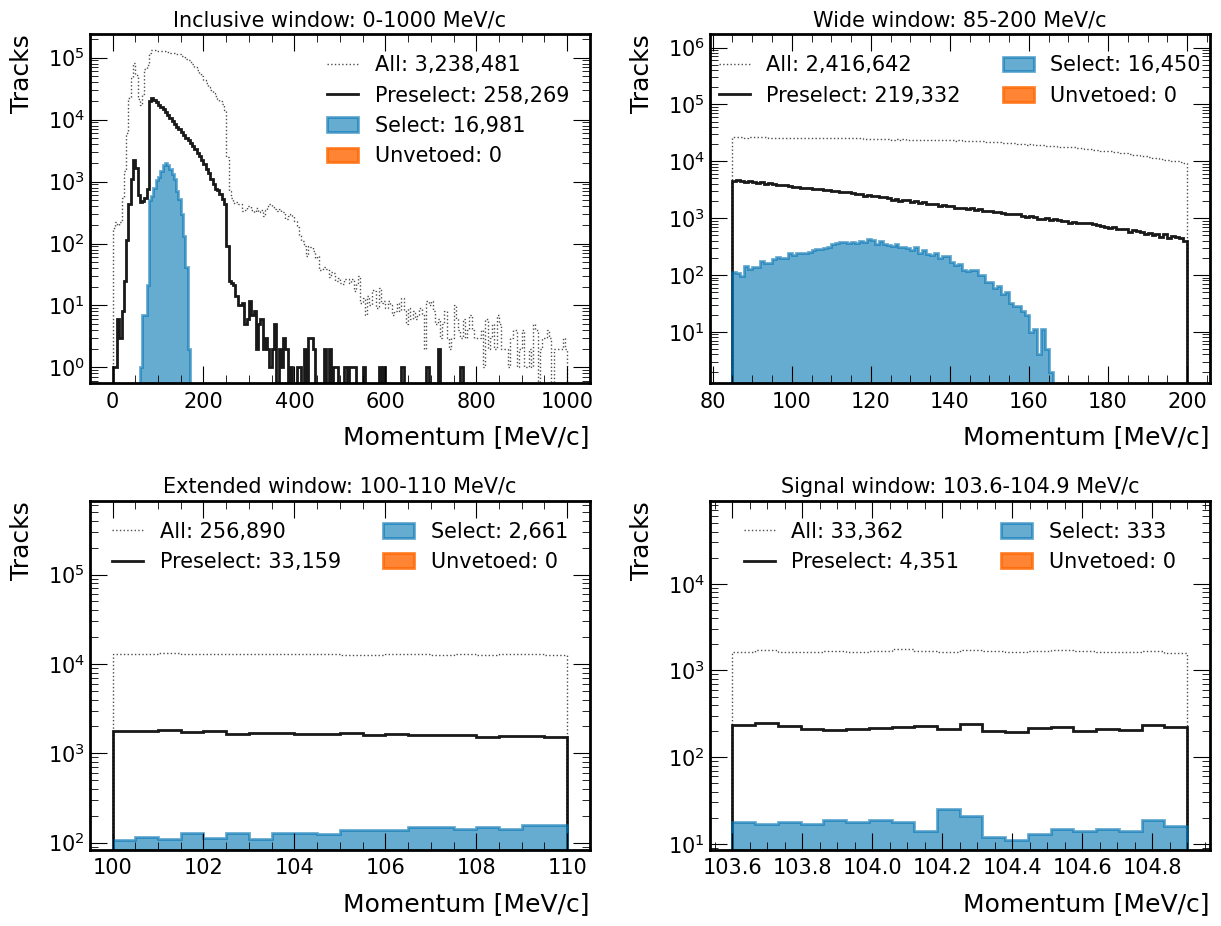

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV/h1o_3x3_summary.png


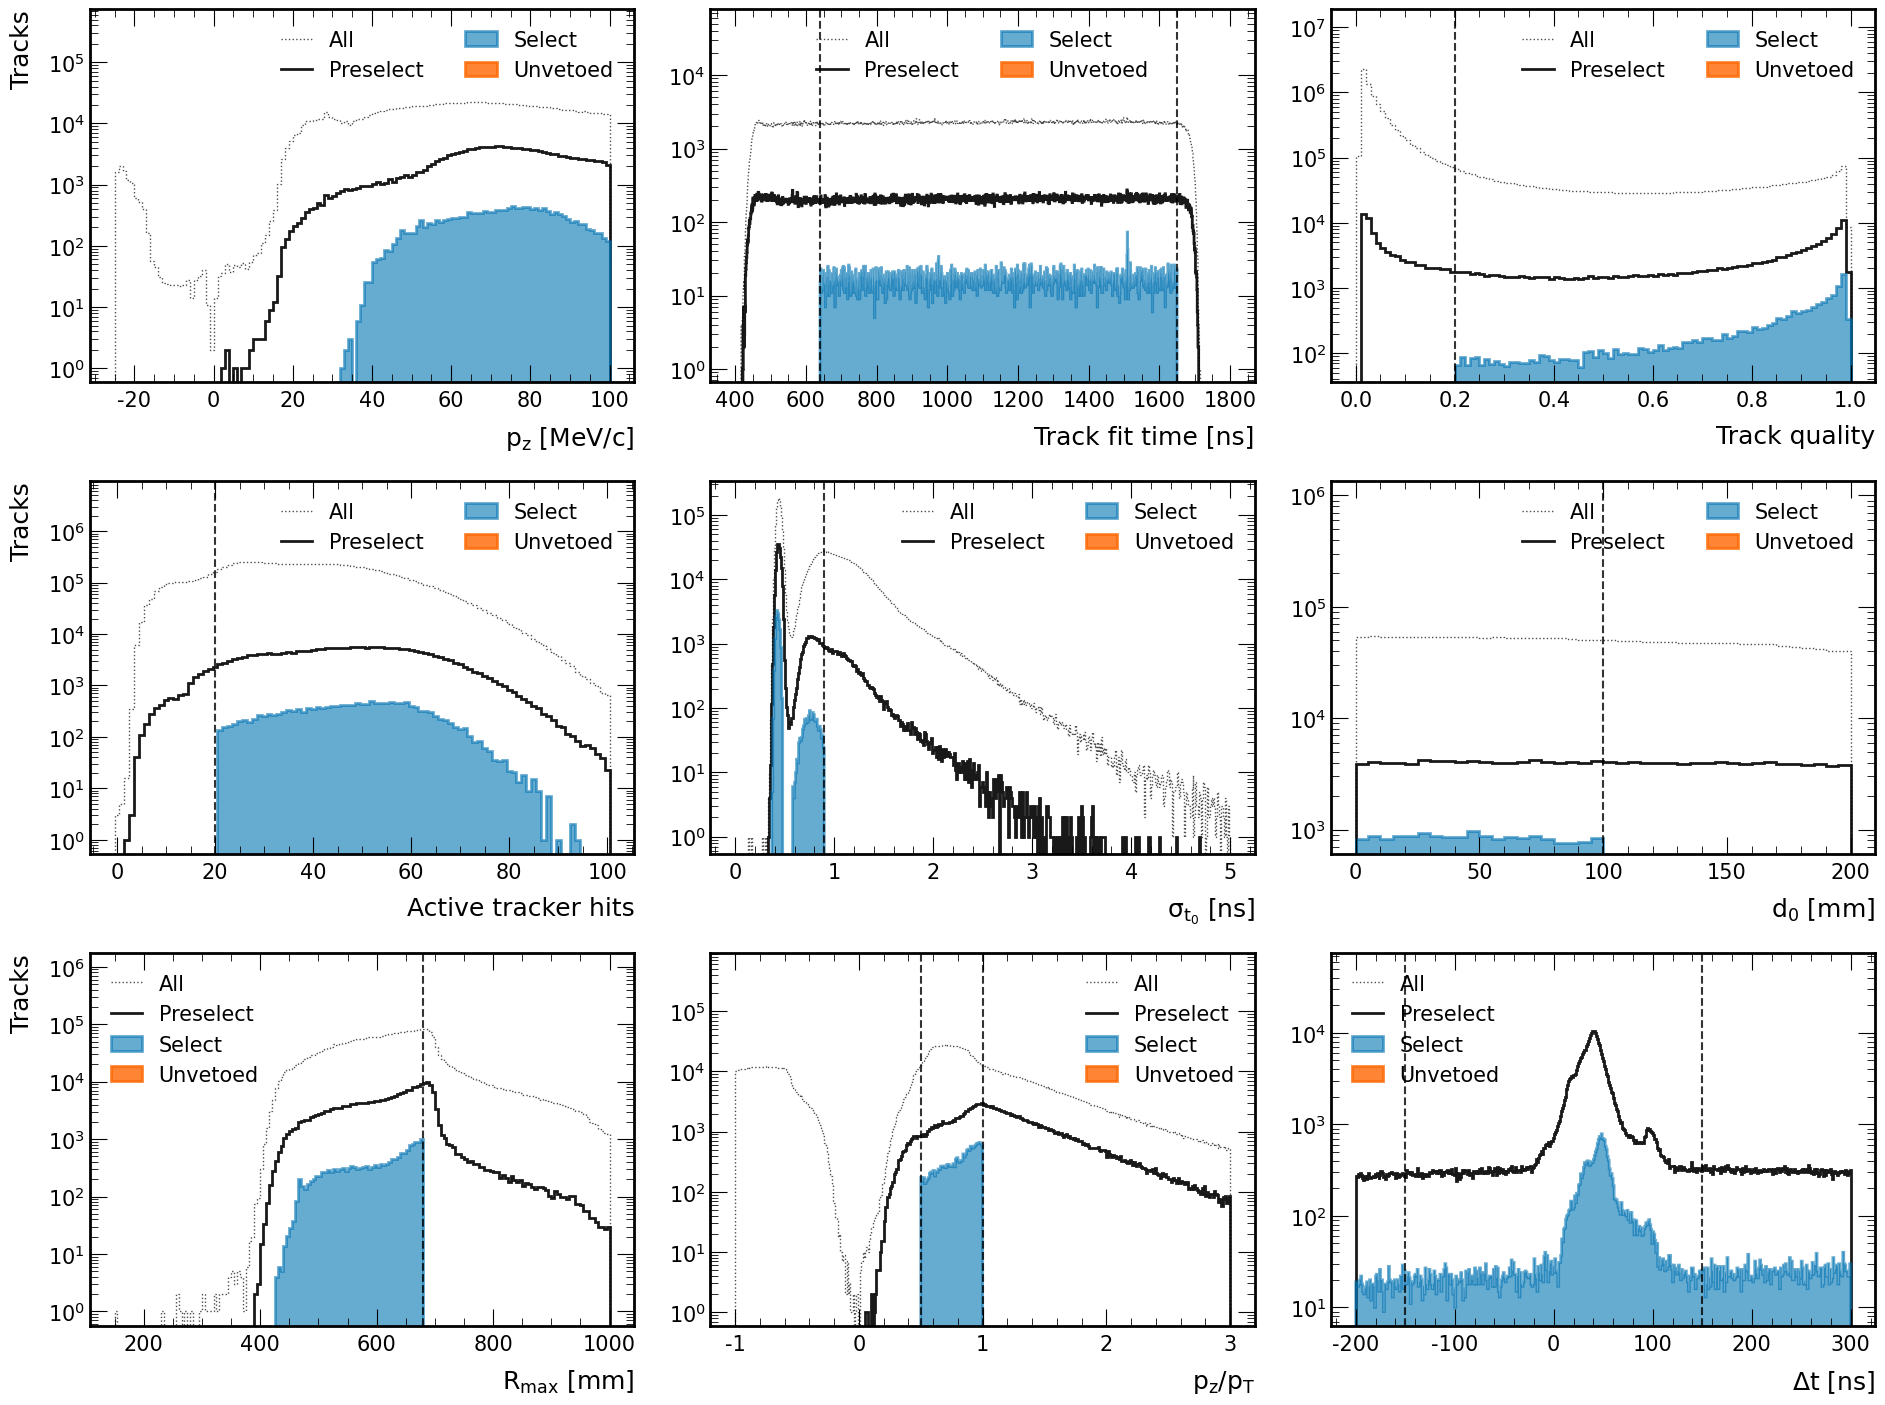

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV/h1o_2x2_mom_summary.png


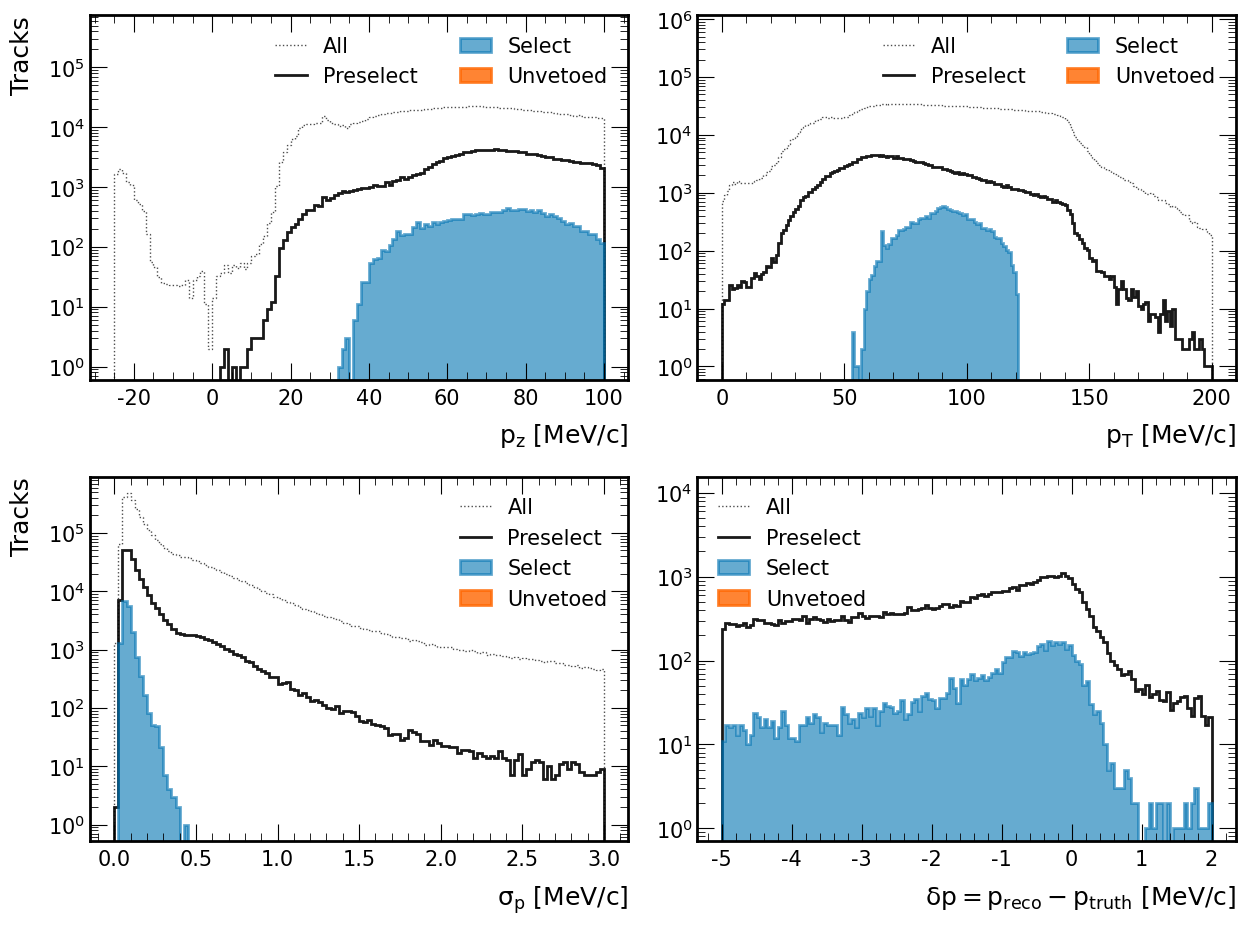

In [11]:
draw.plot_mom_summary(results["hists"], out_path=f"{img_dir}/h1o_2x2_mom_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_mix2BB_onspill-LH_aw_noCRV/h1o_crv_z.png


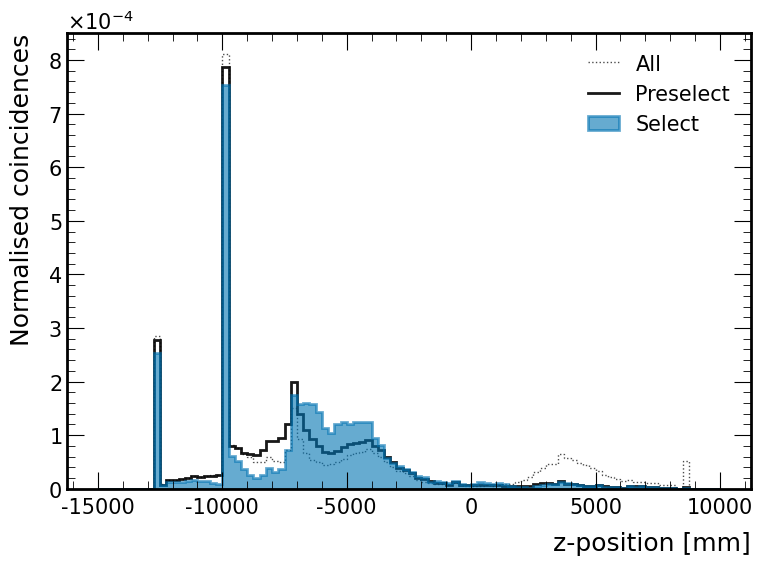

In [12]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [13]:
# print(results["event_info"])

In [14]:
# if results["events"] is not None:
#     from pyutils.pyprint import Print
#     printer = Print()
#     printer.print_n_events(results["events"], n_events = len(results["events"]))